In [1]:
#import dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
from time import strptime
from datetime import date
import re
from scipy.stats import linregress

# Import API key
from config import gkey

In [2]:
#Import data
gun_data = "gun-violence.csv"
income_data = "percapita_income.csv"
population_data = "population_data.csv"

# Read the mouse data and the study results
gun_data = pd.read_csv(gun_data,low_memory =False)
income_data = pd.read_csv(income_data)
population_data = pd.read_csv(population_data,encoding='latin-1')
population_data.head()

,Id,Id2,Geography,2010,2011,2012,2013,2014,2015,2016,2017,2018,county,state
0,0500000US01001,1001,"Autauga County, Alabama",54754,55208,54936,54713,54876,54838,55242,55443,55601,Autauga,Alabama
1,0500000US01003,1003,"Baldwin County, Alabama",183111,186540,190143,194886,199189,202995,207712,212619,218022,Baldwin,Alabama
2,0500000US01005,1005,"Barbour County, Alabama",27330,27350,27174,26944,26758,26294,25819,25158,24881,Barbour,Alabama
3,0500000US01007,1007,"Bibb County, Alabama",22872,22747,22664,22516,22541,22562,22576,22555,22400,Bibb,Alabama
4,0500000US01009,1009,"Blount County, Alabama",57373,57554,57570,57611,57521,57522,57517,57827,57840,Blount,Alabama


In [3]:
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,274168,1/1/2015,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::27||1::26,0::Adult 18+||1::Adult 18+,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0
1,276211,1/1/2015,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::63,0::Adult 18+,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0
2,272302,1/1/2015,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::26,0::Adult 18+,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0
3,272482,1/1/2015,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,NaN,NaN,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0
4,272487,1/1/2015,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,NaN,NaN,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0


In [4]:
# Convert the date in to datetime format and extract the month and year of the incident
gun_data['date']= pd.to_datetime(gun_data['date']) 
gun_data['month'] = gun_data['date'].dt.month_name(locale = 'EN_US') 
gun_data['year'] = gun_data['date'].dt.year

In [5]:
# get the table created 
gv_count_table = gun_data[["incident_id", "month", "year"]]
gv_count_table.head()

,incident_id,month,year
0,274168,January,2015
1,276211,January,2015
2,272302,January,2015
3,272482,January,2015
4,272487,January,2015


In [6]:
#get the incident count by months and years 
count_months = gv_count_table['month'].value_counts()
count_years = gv_count_table['year'].value_counts()
years = ["2015","2016","2017"]

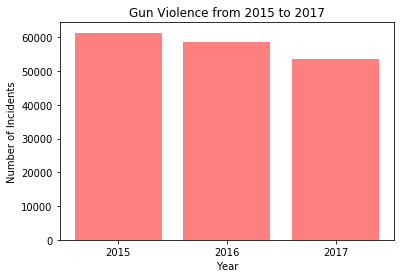

In [7]:
#plot the bar chart 
plt.bar(years, count_years, color='r', alpha=0.5, align="center")
plt.title("Gun Violence from 2015 to 2017")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.savefig("bar1.png")
plt.show()

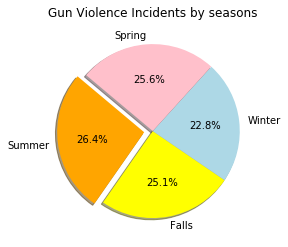

In [8]:
#groupby month to calculate the data by seasons
count_months_df = pd.DataFrame(count_months)
count_months_df
summer_incidents = count_months["June"] + count_months["July"] + count_months["August"]
fall_incidents = count_months["September"] + count_months["October"] + count_months["November"]
winter_incidents = count_months["December"] + count_months["January"] + count_months["February"]
spring_incidents = count_months["March"] + count_months["April"] + count_months["May"]

# Labels for the sections of our pie chart
labels = ["Summer", "Falls", "Winter", "Spring"]

# The values of each section of the pie chart
sizes = [summer_incidents, fall_incidents, winter_incidents, spring_incidents]

# The colors of each section of the pie chart
colors = ["orange", "yellow", "lightblue", "pink"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gun Violence Incidents by seasons")
plt.savefig("pieweather.png")
plt.show()

In [9]:
#get the count of violence count by month and year
gv_count_table= gv_count_table.groupby(["month", "year"]).size().sort_values(ascending=False) \
  .reset_index(name='count of violence')
gv_count_table.head()

,month,year,count of violence
0,May,2017,5666
1,April,2017,5577
2,July,2017,5547
3,August,2016,5527
4,January,2017,5258


In [10]:
gv_count_table.to_csv("gv_by_monthandyear.csv")

In [11]:
#display the data by Incident ID, State, Month and Year
gv_by_state = gun_data[["incident_id", "state","month", "year"]]
gv_by_state.head()

,incident_id,state,month,year
0,274168,Oklahoma,January,2015
1,276211,Louisiana,January,2015
2,272302,Mississippi,January,2015
3,272482,Alabama,January,2015
4,272487,Illinois,January,2015


In [12]:
#Sort the data by violence count
gv_by_state = gv_by_state.groupby(["state", "month", "year"]).size().sort_values(ascending=False) \
  .reset_index(name='count of violence')
gv_by_state.head()


,state,month,year,count of violence
0,California,June,2017,572
1,Illinois,August,2016,543
2,California,July,2017,505
3,Illinois,October,2016,498
4,Illinois,June,2017,494


In [13]:
gv_by_state.to_csv("gv_by_state.csv")

Number of people killed in last 3 yr: 88250
Number of people injured in last 3 yr: 44061
Number of people involved in incident in last 3 yr: 67617


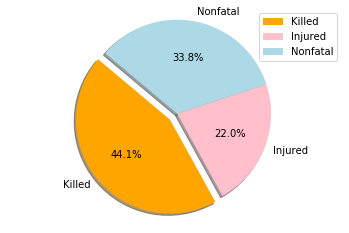

In [14]:
# find out the values of people killed, injured and non-injured during the 3 yr time period
injured_count =gun_data["n_killed"].sum()
killed_count =gun_data["n_injured"].sum()
nofatal_count =0
for i in range(len(gun_data)):
    if gun_data["n_killed"][i] ==0 and gun_data["n_injured"][i] ==0  :
        nofatal_count = nofatal_count+1
        
print(f"Number of people killed in last 3 yr: {killed_count}")
print(f"Number of people injured in last 3 yr: {injured_count}")
print(f"Number of people involved in incident in last 3 yr: {nofatal_count}")

# Labels for the sections of our pie chart
labels = ["Killed", "Injured", "Nonfatal"]

# The values of each section of the pie chart
sizes = [killed_count, injured_count, nofatal_count]

# The colors of each section of the pie chart
colors = ["orange", "pink", "lightblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend()
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.savefig("piefatal.png")
plt.show()

# Location Analysis:

In [15]:
gun_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,month,year
0,274168,2015-01-01,Oklahoma,Tulsa,4840 South Memorial Dr,0,2,http://www.gunviolencearchive.org/incident/274168,http://www.tulsaworld.com/news/crimewatch/thre...,False,...,0::Female||1::Male,"2::Steven Desean ""Steezo"" Courtney",NaN,0::Injured||1::Injured||2::Unharmed,0::Victim||1::Victim||2::Subject-Suspect,http://www.tulsaworld.com/news/crimewatch/thre...,75.0,25.0,January,2015
1,276211,2015-01-01,Louisiana,Labadieville,NaN,1,0,http://www.gunviolencearchive.org/incident/276211,http://www.wafb.com/story/27765450/investigato...,False,...,0::Male,"0::Gordon Jones, Senior",NaN,0::Killed,0::Victim,http://www.wafb.com/story/27765450/investigato...,51.0,17.0,January,2015
2,272302,2015-01-01,Mississippi,Hattiesburg,Nugget Court,0,0,http://www.gunviolencearchive.org/incident/272302,http://www.wdam.com/story/27743511/2-hattiesbu...,False,...,0::Male,0::Terry Turner,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.wdam.com/story/27743511/2-hattiesbu...,102.0,45.0,January,2015
3,272482,2015-01-01,Alabama,Bessemer,Bessemer Superhighway and Avenue P,0,2,http://www.gunviolencearchive.org/incident/272482,http://www.myfoxal.com/story/27742512/police-i...,False,...,0::Male||1::Male,NaN,NaN,0::Injured||1::Injured,0::Victim||1::Victim,http://www.myfoxal.com/story/27742512/police-i...,57.0,19.0,January,2015
4,272487,2015-01-01,Illinois,Chicago,2200 block of North Narragansett Avenue,0,1,http://www.gunviolencearchive.org/incident/272487,http://www.chicagotribune.com/news/local/break...,False,...,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.chicagotribune.com/news/local/break...,3.0,2.0,January,2015


In [16]:
# get the county and state along wit Incident ID
city = gun_data[["city_or_county", "state", "incident_id"]]

In [17]:
#group by county and state to avoid duplicates in county and get the count of Incident ID
group_city = city.groupby(["city_or_county", "state"])["incident_id"].size().sort_values(ascending=False) \
  .reset_index(name='count of violence')

In [18]:
target_city =group_city["city_or_county"] +", " + group_city["state"]
#print(f'{target_city}')

target_city ='"' + target_city + '"'
target_city[0:5]

0                   "Chicago, Illinois"
1                 "Baltimore, Maryland"
2    "Washington, District of Columbia"
3              "New Orleans, Louisiana"
4               "Jacksonville, Florida"
dtype: object

In [19]:
# Base url for google geocode API search
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# To get the top100 cities with the most incidents

N = 100
city100 = target_city[0:N]

# To creat a list with size 100. The items are called "Error" for now, then it will be filled with county names
county = ["Error"]*N

# for loop that loops from 0 to 99   
for i in range(len(city100)):
 
    # google api search parameters
    params = {"address": city100[i], "key": gkey}
    
    # To get json file from google
    response = requests.get(base_url, params=params).json()
        
    # in google json file the only way to get the county name is to find which row has "administratve area level 2"    
    for j in range(3):
            
        k = 1
        x = response["results"][0]["address_components"][j]["types"][0]
        if x == "administrative_area_level_2":
            k = j
            
    # To fill the county names    
    county[i] = response["results"][0]["address_components"][k]["long_name"]
            
# Some cities dont have county names. So I had to fix them manually

county[1] = "Baltimore County"
county[6] = "Saint Louis"
county[23] = "Richmond"
county[28] = "Oklahoma County"
county[67] = "Norfolk"
county[78] = "Newport News"
county[87] = "McMinn County"

county

['Cook County',
 'Baltimore County',
 'District of Columbia',
 'Orleans Parish',
 'Duval County',
 'Shelby County',
 'Saint Louis',
 'Milwaukee County',
 'Philadelphia County',
 'Harris County',
 'Marion County',
 'Cuyahoga County',
 'Suffolk County',
 'Bexar County',
 'Kings County',
 'Wayne County',
 'Jefferson County',
 'Clark County',
 'Davidson County',
 'Fulton County',
 'Tulsa County',
 'Mecklenburg County',
 'Franklin County',
 'Richmond',
 'Dallas County',
 'Peoria County',
 'Jefferson County',
 'Hamilton County',
 'Oklahoma County',
 'Virginia',
 'Allegheny County',
 'Multnomah County',
 'Fresno County',
 'Orange County',
 'Alameda County',
 'Winnebago County',
 'Los Angeles County',
 'Maricopa County',
 'Pulaski County',
 'Douglas County',
 'Montgomery County',
 'Hinds County',
 'East Baton Rouge Parish',
 'Oklahoma County',
 'Caddo Parish',
 'Bronx County',
 'Miami-Dade County',
 'Sedgwick County',
 'Hampden County',
 'El Paso County',
 'Bernalillo County',
 'Lucas County',

In [20]:
#find the top 100 counties with the count of violence 
#(here city data was merged to get collective data of each county)

group100 = group_city[0:N]

top_100_county = group100.copy() 
top_100_county["county"] = county
top_100_county = top_100_county.rename(columns={"city_or_county":"city"})

top_100_county["county"] = top_100_county["county"].apply(lambda x: re.sub(' County','',x))
top_100_county["county"] = top_100_county["county"].apply(lambda x: re.sub(' Parish','',x))
top_100_county = top_100_county[["state", "city", "county", "count of violence"]]
top_100_county = top_100_county[top_100_county.city != "Chicago (Englewood)"]
top_100_county


,state,city,county,count of violence
0,Illinois,Chicago,Cook,8256
1,Maryland,Baltimore,Baltimore,2943
2,District of Columbia,Washington,District of Columbia,2173
3,Louisiana,New Orleans,Orleans,2167
4,Florida,Jacksonville,Duval,1922
5,Tennessee,Memphis,Shelby,1861
6,Missouri,Saint Louis,Saint Louis,1834
7,Wisconsin,Milwaukee,Milwaukee,1794
8,Pennsylvania,Philadelphia,Philadelphia,1754
9,Texas,Houston,Harris,1711


In [21]:
#getting population data and cleaning to display only selective fields
population_data = population_data[['state','county','2015','2016','2017']]
population_data['mean_population'] =round(population_data.mean(axis = 1, skipna = True))

#merge the top 100 cities with polualtion data
population_county = pd.merge(top_100_county, population_data, how='inner', on=['state', 'county'])

#calculate the crime rate
population_county['crime_rate'] = round(population_county['count of violence']*100000/population_county['mean_population'],1)
population_county = population_county.sort_values(["crime_rate"], ascending=[False])
population_county

,state,city,county,count of violence,2015,2016,2017,mean_population,crime_rate
3,Louisiana,New Orleans,Orleans,2167,389791,391977,391538,391102.0,554.1
2,Maryland,Baltimore,Baltimore,2943,622150,615849,609841,615947.0,477.8
21,Illinois,Peoria,Peoria,746,186512,185073,182578,184721.0,403.9
1,Maryland,Baltimore,Baltimore,2943,827471,828616,828603,828230.0,355.3
45,Georgia,Columbus,Muscogee,548,198674,196198,193766,196213.0,279.3
37,Mississippi,Jackson,Hinds,616,244241,242232,240033,242169.0,254.4
39,Louisiana,Shreveport,Caddo,608,251361,248885,246034,248760.0,244.4
32,Illinois,Rockford,Winnebago,683,287222,286054,284740,286005.0,238.8
63,Georgia,Macon,Bibb,352,153948,153180,152892,153340.0,229.6
59,Missouri,Columbia,Boone,384,174585,176667,178523,176592.0,217.5


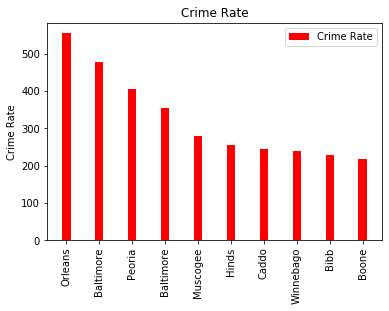

In [38]:
top10_crime_rate = population_county.head(10)

x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, top10_crime_rate['county'])
plt.xticks(x, top10_crime_rate['county'], rotation='vertical')
bar_1 = plt.bar(x,top10_crime_rate['crime_rate'], color = 'red', width = 0.25)
plt.legend([bar_1], ['Crime Rate'])
plt.title("Crime Rate")
plt.ylabel("Crime Rate")
plt.savefig("top10crime_rate.png")
plt.show()

In [23]:
income_data['mean_salary'] =round(income_data.mean(axis = 1, skipna = True),2)
income_data = income_data.rename(columns={"State":"state", "County": "county"})


income_county = pd.merge(top_100_county, income_data , how='inner', on=['state', 'county'])

income_county.sort_values(by=['count of violence', 'mean_salary'], ascending=False)
income_county.head(10)


,state,city,county,count of violence,2015,2016,2017,mean_salary
0,Illinois,Chicago,Cook,8256,56470.0,57285.0,59238.0,57664.33
1,Maryland,Baltimore,Baltimore,2943,55215.0,56829.0,59130.0,57058.00
2,Louisiana,New Orleans,Orleans,2167,47416.0,47818.0,49222.0,48152.00
3,Florida,Jacksonville,Duval,1922,42106.0,42617.0,44347.0,43023.33
4,Tennessee,Memphis,Shelby,1861,45324.0,46321.0,47655.0,46433.33
5,Wisconsin,Milwaukee,Milwaukee,1794,43291.0,43621.0,45099.0,44003.67
6,Pennsylvania,Philadelphia,Philadelphia,1754,50764.0,54256.0,55718.0,53579.33
7,Texas,Houston,Harris,1711,54100.0,51186.0,53188.0,52824.67
8,Indiana,Indianapolis,Marion,1374,47978.0,49439.0,50957.0,49458.00
9,Ohio,Cleveland,Cuyahoga,1342,49588.0,50598.0,52783.0,50989.67


In [24]:
income_county_scatter_df = income_county[["county","count of violence","mean_salary"]]
income_county_scatter_df.head()


,county,count of violence,mean_salary
0,Cook,8256,57664.33
1,Baltimore,2943,57058.00
2,Orleans,2167,48152.00
3,Duval,1922,43023.33
4,Shelby,1861,46433.33


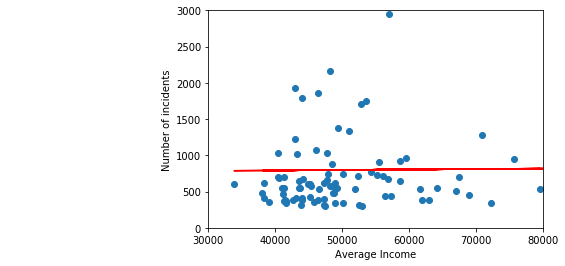

0.011156123487181245


In [25]:
# income_county_scatter_df.plot(kind="scatter", x="mean_salary", y="count of violence", grid=True,
#               title="Average income vs Gun violence")

# plt.xlabel("Average Income")
# plt.ylabel("Gun Violence")
# plt.xlim(30000, 80000)
# plt.ylim(0, 3000)
# plt.savefig("scatter.png")
# plt.show()


x_values = income_county['mean_salary']
y_values = income_county['count of violence']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Income')
plt.ylabel('Number of incidents')
plt.xlim(30000, 80000)
plt.ylim(0, 3000)
plt.savefig("scatter1.png")
plt.show()
print(rvalue)

In [26]:
crime_rate = pd.merge(population_county, income_data , how='inner', on=['state', 'county'])
crime_rate

,state,city,county,count of violence,2015_x,2016_x,2017_x,mean_population,crime_rate,2015_y,2016_y,2017_y,mean_salary
0,Louisiana,New Orleans,Orleans,2167,389791,391977,391538,391102.0,554.1,47416.0,47818.0,49222.0,48152.00
1,Maryland,Baltimore,Baltimore,2943,622150,615849,609841,615947.0,477.8,55215.0,56829.0,59130.0,57058.00
2,Maryland,Baltimore,Baltimore,2943,827471,828616,828603,828230.0,355.3,55215.0,56829.0,59130.0,57058.00
3,Illinois,Peoria,Peoria,746,186512,185073,182578,184721.0,403.9,47793.0,47592.0,48263.0,47882.67
4,Georgia,Columbus,Muscogee,548,198674,196198,193766,196213.0,279.3,39753.0,40786.0,42483.0,41007.33
5,Mississippi,Jackson,Hinds,616,244241,242232,240033,242169.0,254.4,38149.0,38112.0,38758.0,38339.67
6,Louisiana,Shreveport,Caddo,608,251361,248885,246034,248760.0,244.4,46698.0,44553.0,44565.0,45272.00
7,Illinois,Rockford,Winnebago,683,287222,286054,284740,286005.0,238.8,39836.0,40113.0,41682.0,40543.67
8,Georgia,Macon,Bibb,352,153948,153180,152892,153340.0,229.6,38273.0,38841.0,40031.0,39048.33
9,Missouri,Columbia,Boone,384,174585,176667,178523,176592.0,217.5,43580.0,43816.0,44797.0,44064.33


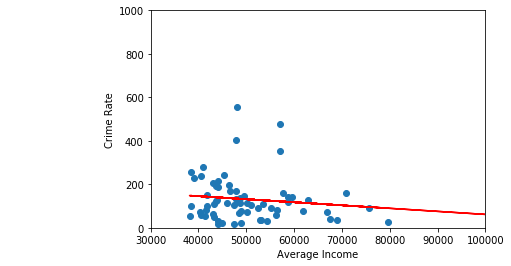

-0.1548326316802159


In [27]:
x_values = crime_rate['mean_salary']
y_values = crime_rate['crime_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Income')
plt.ylabel('Crime Rate')
plt.xlim(30000, 100000)
plt.ylim(0, 1000)
plt.savefig("scatter2.png")
plt.show()
print(rvalue)

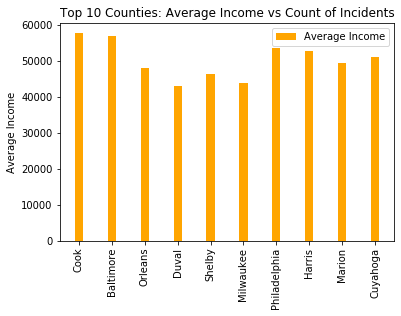

In [36]:
income_county_10_df = income_county_scatter_df.head(10)
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_10_df['county'])
plt.xticks(x, income_county_10_df['county'], rotation='vertical')
bar_1 = plt.bar(x,income_county_10_df['mean_salary'], color = 'orange', width = 0.25)
plt.legend([bar_1], ['Average Income'])
plt.title("Top 10 Counties: Average Income vs Count of Incidents")
plt.ylabel('Average Income')
plt.savefig("top10income.png")
plt.show()

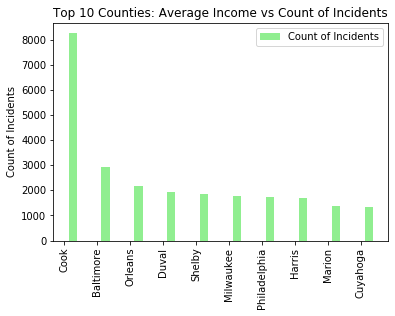

In [37]:
income_county_10_df = income_county_scatter_df.head(10)
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_10_df['county'])
plt.xticks(x, income_county_10_df['county'], rotation='vertical')
bar_2 = plt.bar(x+0.25,income_county_10_df['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_2], ['Count of Incidents'])
plt.title("Top 10 Counties: Average Income vs Count of Incidents")
plt.ylabel('Count of Incidents')
plt.savefig("top10incidents.png")
plt.show()

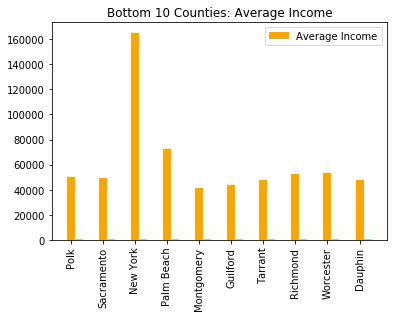

In [30]:
income_county_tail_df = income_county_scatter_df.tail(10)
income_county_tail_df
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_tail_df ['county'])
plt.xticks(x, income_county_tail_df['county'], rotation='vertical')
bar_1 = plt.bar(x,income_county_tail_df ['mean_salary'], color = 'orange', width = 0.25)
bar_2 = plt.bar(x+0.25,income_county_tail_df ['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_1], ['Average Income'])
plt.title("Bottom 10 Counties: Average Income")
plt.savefig("bottom10income.png")
plt.show()


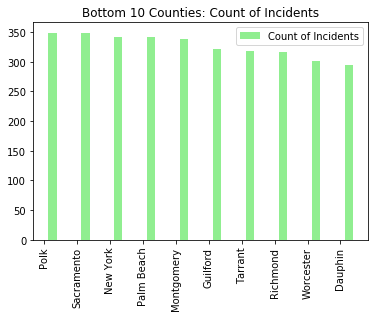

In [31]:
income_county_tail_df = income_county_scatter_df.tail(10)
income_county_tail_df
x = np.arange(10)
tick_locations = [value for value in x]
plt.xticks(tick_locations, income_county_tail_df ['county'])
plt.xticks(x, income_county_tail_df['county'], rotation='vertical')
bar_2 = plt.bar(x+0.25,income_county_tail_df ['count of violence'], color = 'lightgreen', width = 0.25)
plt.legend([bar_2], ['Count of Incidents'])
plt.title("Bottom 10 Counties: Count of Incidents")
plt.savefig("bottom10incidents.png")
plt.show()

# Gender Analysis:

In [32]:
# get the gender data from the main table
gender_table = gun_data[["participant_gender"]]
gender_table.head()

,participant_gender
0,0::Female||1::Male
1,0::Male
2,0::Male
3,0::Male||1::Male
4,0::Male


In [33]:
#Calculate the count of male and female involve in the gun violence incidents
male_count = gender_table.participant_gender.str.count("Male").sum()
female_count = gender_table.participant_gender.str.count("Female").sum()

In [34]:
# format the pie chart
pie_chart = male_count, female_count
colors = ["dodgerblue", "palevioletred"]
gender = ["Male", "Female"]
explode = (0.1, 0)

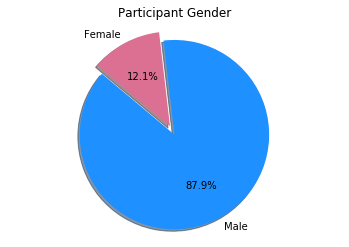

In [35]:
#create a pie chart to diplay % of gender inolved in the gun violence incident
plt.pie(pie_chart, colors = colors, labels = gender, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Participant Gender")
plt.savefig("gender.png")
plt.show()